# RNN(LSTM) model on mnist dataset for classification of digits using tensorflow

In [1]:
import tensorflow as tf

### Importing various functions from tensorflow.keras

In [2]:
from tensorflow.keras.layers import Dense, LSTM, Input, Flatten
from tensorflow.keras.models import Model

### loading mnist dataset

In [3]:
data = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = data.load_data()

x_train,x_test = x_train/255.0, x_test/255.0

print('x_train.shape ',x_train.shape)

x_train.shape  (60000, 28, 28)


### Building model using Functional API

In [4]:
i = Input(shape=(28,28))

x = LSTM(64, activation = 'relu')(i)
x = Flatten()(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Training Data along with validation on Test Data

In [6]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5657 - accuracy: 0.8148 - val_loss: 0.1475 - val_accuracy: 0.9515
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1444 - accuracy: 0.9549 - val_loss: 0.1104 - val_accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1024 - accuracy: 0.9680 - val_loss: 0.0874 - val_accuracy: 0.9714
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0863 - val_accuracy: 0.9730
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0696 - accuracy: 0.9791 - val_loss: 0.0650 - val_accuracy: 0.9774
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0481 - 

### Model loss and accuracy on test data

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0435 - accuracy: 0.9880


[0.04354819282889366, 0.9879999756813049]

### Plot of loss and val_loss

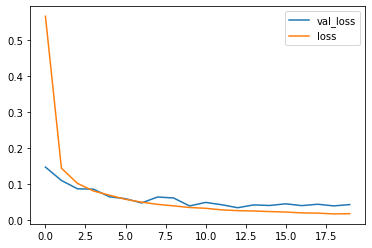

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.plot(r.history['loss'],label = 'loss')
plt.legend()

### Plot of accuracy and val_accuracy

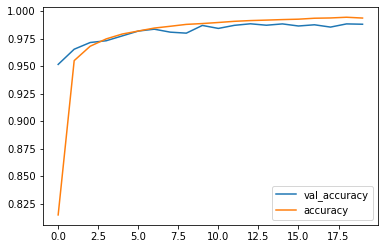

In [9]:
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.legend()